This notebook 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [11]:
G.clear()

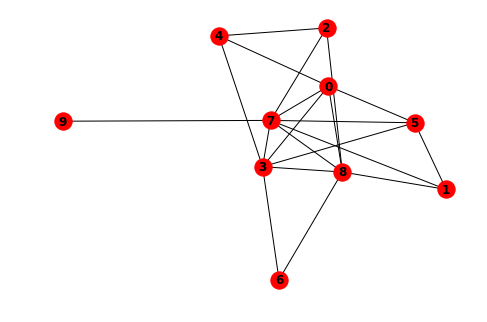

In [26]:
G = nx.Graph()
n = 10
p = .5
for i in range(n):
    G.add_node(i)

for i in range(n):
    for j in range(i+1,n):
        if random.random()<p:
            G.add_edge(i,j)
nx.draw(G,with_labels=True,font_weight='bold')
#G.clear()"

In [27]:
links = nx.degree(G)
print("Links =",links)
degree=0
for x in links:
    degree+=x[1]
print("Degrees =",degree)
print("Link Count =",degree/2)

Links = [(0, 5), (1, 3), (2, 3), (3, 6), (4, 3), (5, 4), (6, 2), (7, 7), (8, 6), (9, 1)]
Degrees = 40
Link Count = 20.0


In [28]:
average_degree = degree / n
print("Average Degree =",average_degree)

Average Degree = 4.0


Degrees per Node


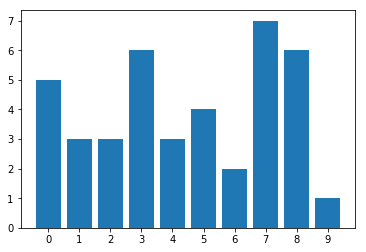

In [29]:
h_dict={}
for i in range(0,n):
    h_dict[i]=links[i]

def hist_dict(dict_):
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

print("Degrees per Node")
hist_dict(h_dict)

In [30]:
h_dict={}
for i in range(0,n-1):
    h_dict[i]=0
    
for i in links:
    p=links[i[0]]
    h_dict[p]+=1

def hist_dict(dict_):
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

print("Distribution of degrees")
hist_dict(h_dict)

Distribution of degrees


In [31]:
def count_triangles(n): #global method
    nodes = G.nodes()
    triangles = 0
    for node in nodes:
        temp_list=list()
        temp_edge_list=list()
        for edge in G.edges(node):
            if len(temp_list) > 0:
                for val in temp_list:
                    temp_tuple = (val,edge[1])
                    temp_edge_list.append(temp_tuple)
            temp_list.append(edge[1])
        for tup in temp_edge_list:
            for edge in G.edges():
                if tup==edge: triangles+=1
    return(triangles/3)


tri=count_triangles(n)
print(tri)

def verify_triangles():
    count=0
    for k,v in nx.triangles(G).items():
        count+=v
    return(count/3)
ver_tri = verify_triangles()
if tri == ver_tri: print("Verified with nx.triangles count")
elif tri != ver_tri: print("ERROR IN TRIANGLE COUNT")

12.0
Verified with nx.triangles count


In [48]:
n=int(10)
p=float(0.5)
itera=1000

h_dict={}
for i in range(0,n):
    h_dict[i]=0

t_dict={}
for i in range(0,nchoose3):
    t_dict[i]=0

def dict_nonblank_len(dict_):
    var = 0
    for k,v in dict_.items():
        if v>0: var=k
    return(var)

def ergn(h_dict,t_dict,n,p,itera):
    for i in range(itera):
        try:
            G.clear()
        except:
            pass
        G = nx.Graph()
#        n = 10
#        p = .5
        for i in range(n):
            G.add_node(i)
        for i in range(n):
            for j in range(i+1,n):
                if random.random()<p:
                    G.add_edge(i,j)
        links = nx.degree(G),
        for i in links:
            q=i[0]
            h_dict[q]+=1
        count=0
        for k,v in nx.triangles(G).items():
            count+=v
        count=count/3
        t_dict[count]+=1
    return(h_dict)

def hist_dict(dict_):
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

def hist_dict2(dict_): # Needs update to length to limit it to actual highest key that returns a value > 1\n"
    var = dict_nonblank_len(dict_)
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
#    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

i_dict = ergn(h_dict,t_dict,n,p,itera)
print("The distribution of the mean number of links for a")
print("graph of",n,"nodes and",p,"probability of an edge")
print("across",itera,"iterations is:")
hist_dict(i_dict)
print("And the corresponding distribution for average triangles is:")
hist_dict2(t_dict)
#print(t_dict)"

The distribution of the mean number of links for a
graph of 10 nodes and 0.5 probability of an edge
across 1000 iterations is:


And the corresponding distribution for average triangles is:
